## Simplest $\Delta G'^\circ$ example

In [1]:
import numpy
import matplotlib.pyplot as plt
from equilibrator_api import ComponentContribution, Q_

In [2]:
cc = ComponentContribution()
reaction = cc.parse_reaction_formula("kegg:C00002 + kegg:C00001 = kegg:C00008 + kegg:C00009")

## Basic $\Delta G'$ calculations

In [6]:
reaction = cc.parse_reaction_formula("kegg:C00002 + kegg:C00001 = kegg:C00008 + kegg:C00009")
cc.p_h = Q_(6.4)
cc.p_mg = Q_(3.0)
cc.ionic_strength = Q_("0.25M")
cc.temperature = Q_("298.15K")

dG0_prime = cc.standard_dg_prime(reaction)
print(f"ΔG'° = {dG0_prime}")

dGm_prime = cc.physiological_dg_prime(reaction)
print(f"ΔG'm = {dGm_prime}")

concentrations = [('kegg:C00002', 1.0),
                  ('kegg:C00009', 0.1),
                  ('kegg:C00008', 3.0)]

for cid, conc in concentrations:
    compound = cc.get_compound(cid)
    abundance = Q_(conc, "mM")
    reaction.set_abundance(compound, abundance)

dG_prime = cc.dg_prime(reaction)
print(f"ΔG' = {dG_prime}")

ΔG'° = (-25.80 +/- 0.30) kilojoule / mole
ΔG'm = (-42.91 +/- 0.30) kilojoule / mole
ΔG' = (-45.90 +/- 0.30) kilojoule / mole


## Response to pH example

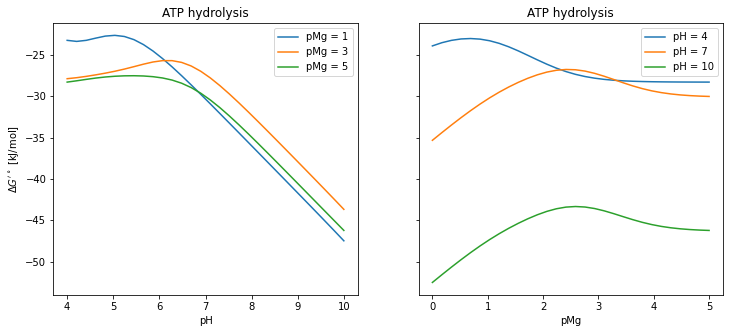

In [5]:
def calc_dg(p_h, p_mg):
    cc.p_h = Q_(p_h)
    cc.p_mg = Q_(p_mg)
    return cc.standard_dg_prime(reaction).value.m_as("kJ/mol")

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax = axs[0]
ph_range = numpy.linspace(4, 10, 30)
ax.plot(ph_range, [calc_dg(p_h, 1) for p_h in ph_range], '-', label="pMg = 1")
ax.plot(ph_range, [calc_dg(p_h, 3) for p_h in ph_range], '-', label="pMg = 3")
ax.plot(ph_range, [calc_dg(p_h, 5) for p_h in ph_range], '-', label="pMg = 5")
ax.set_xlabel('pH')
ax.set_ylabel(r"$\Delta G'^\circ$ [kJ/mol]")
ax.set_title("ATP hydrolysis")
ax.legend();

ax = axs[1]
pmg_range = numpy.linspace(0, 5, 30)
ax.plot(pmg_range, [calc_dg(4, p_mg) for p_mg in pmg_range], '-', label="pH = 4")
ax.plot(pmg_range, [calc_dg(7, p_mg) for p_mg in pmg_range], '-', label="pH = 7")
ax.plot(pmg_range, [calc_dg(10, p_mg) for p_mg in pmg_range], '-', label="pH = 10")
ax.set_xlabel('pMg')
ax.set_title("ATP hydrolysis")
ax.legend();